<a href="https://colab.research.google.com/github/SergeevaAI/Platforms_Data_Sciense/blob/main/04_2_LinearRegression2hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Практическая работа 4-2: Линейная регрессия 2

Name: Сергеева

Email: Анастасия


## ##  Анализ набора кредитных данных

Вспомните набор данных «Кредит», рассмотренный на занятии и доступный [здесь](http://www-bcf.usc.edu/~gareth/ISL/data.html).
Этот набор данных состоит из информации о кредитных картах 400 человек.

Сначала импортируйте данные и преобразуйте доход в тысячи.

In [2]:
from google.colab import files

uploaded = files.upload()

Saving Credit.csv to Credit.csv


In [3]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm     #Last lecture: used statsmodels.formula.api.ols() for OLS
from sklearn import linear_model         #Last lecture: used sklearn.linear_model.LinearRegression() for OLS

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Import data from Credit.csv file
credit = pd.read_csv('Credit.csv',index_col=0) #load data
credit["Income"] = credit["Income"].map(lambda x: 1000*x)
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14891.0,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106025.0,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104593.0,7075,514,4,71,11,Male,No,No,Asian,580
4,148924.0,9504,681,3,36,11,Female,No,No,Asian,964
5,55882.0,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
396,12096.0,4100,307,3,32,13,Male,No,Yes,Caucasian,560
397,13364.0,3838,296,5,65,17,Male,No,No,African American,480
398,57872.0,4171,321,5,67,12,Female,No,Yes,Caucasian,138
399,37728.0,2525,192,1,44,13,Male,No,Yes,Caucasian,0


Предварительно провести кросс-валидацию модели.

## Задание 1. Первая регрессионная модель

**Упражнение:** Лимит средств по рейтингу:


$$
\text{Limit} = \beta_0 + \beta_1 \text{Rating}.
$$

Поскольку кредитные рейтинги в основном используются банками для определения кредитных лимитов, ожидаем, что рейтинг будет в прямой зависимости для лимита, поэтому эта регрессия должна быть очень хорошей.

Используйте функцию `ols` из библиотеки Python `statsmodels`. Каково значение $R^2$? Что такое $H_0$ и $H_A$ для соответствующей проверки гипотезы и каково значение $p$?


Перекрестная проверка (кросс-валидация)

Для начала нужно построить модель простой линейной регрессии.

[[283]
 [483]
 [514]
 [681]
 [357]
 [569]
 [259]
 [512]
 [266]
 [491]
 [589]
 [138]
 [394]
 [511]
 [269]
 [200]
 [286]
 [339]
 [448]
 [479]
 [235]
 [458]
 [213]
 [398]
 [156]
 [326]
 [289]
 [333]
 [949]
 [411]
 [413]
 [210]
 [563]
 [162]
 [199]
 [220]
 [455]
 [462]
 [300]
 [264]
 [253]
 [538]
 [351]
 [445]
 [469]
 [564]
 [376]
 [320]
 [205]
 [354]
 [376]
 [301]
 [394]
 [413]
 [138]
 [154]
 [372]
 [367]
 [281]
 [390]
 [364]
 [254]
 [160]
 [251]
 [223]
 [320]
 [694]
 [380]
 [418]
 [505]
 [318]
 [538]
 [355]
 [338]
 [418]
 [224]
 [251]
 [253]
 [468]
 [171]
 [288]
 [317]
 [344]
 [122]
 [232]
 [828]
 [448]
 [182]
 [352]
 [543]
 [431]
 [456]
 [249]
 [388]
 [245]
 [120]
 [367]
 [266]
 [241]
 [607]
 [256]
 [190]
 [531]
 [682]
 [365]
 [259]
 [115]
 [263]
 [449]
 [279]
 [250]
 [231]
 [491]
 [474]
 [268]
 [369]
 [186]
 [626]
 [173]
 [137]
 [128]
 [599]
 [481]
 [117]
 [192]
 [195]
 [433]
 [259]
 [610]
 [279]
 [281]
 [162]
 [407]
 [427]
 [452]
 [257]
 [314]
 [278]
 [175]
 [728]
 [459]
 [483]
 [549]

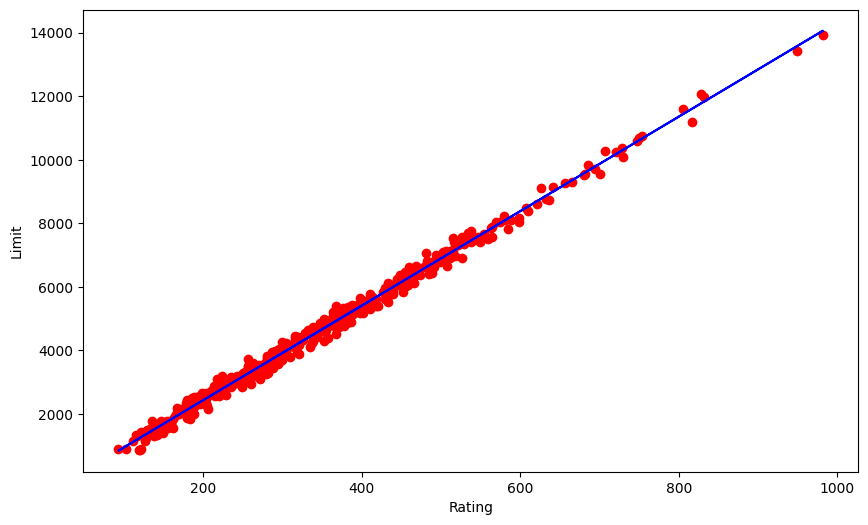

In [ ]:
lr = linear_model.LinearRegression() # создать объект линейной регрессии

# с помощью scikit-learn нам нужно извлечь значения из pandas dataframe
x = credit['Rating'].values.reshape(credit['Rating'].shape[0],1)
y = credit['Limit'].values.reshape(credit['Limit'].shape[0],1)
print(x)

lr.fit(X=x, y=y)

plt.scatter(x, y,  color='red')
plt.plot(x, lr.predict(x), color='blue')

plt.xlabel('Rating')
plt.ylabel('Limit')
plt.show()

Стоит проверить, улучшит ли перекрестная проверка нашу модель, для этого воспользовалась cross_val_score, рекомендуется брать cv 5 или 10, взяла 5, т. к. небольшой набор данных.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, x, y, cv=5)
scores

array([0.99532773, 0.99251201, 0.99154141, 0.99320774, 0.99509756])

Точность моделей 99%, что очень хорошо.

Разделение набора данных на тестовую и обучающую выборки.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(240, 1) (240, 1)
(160, 1) (160, 1)


Перекрестная проверка с помощью cross_validate.

In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(lr, X_train, y_train, cv=5, return_estimator=True)
cv_results

{'fit_time': array([0.0028162 , 0.00423622, 0.00326753, 0.00324273, 0.01358151]),
 'score_time': array([0.00068736, 0.0006628 , 0.00057554, 0.00055766, 0.00272727]),
 'estimator': [LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()],
 'test_score': array([0.989757  , 0.99508174, 0.99314423, 0.99336015, 0.99491213])}

Время для обучения моделей маленькое (0.002, 0.004, 0.003, 0.003, 0.0134), время выставления оценки в тестовом наборе тоже незначительное.
estimator говорит, что было 5 обученных моделей, а точность всех моделей превыщает 90%.


Прогнозирование с помощью перекрестной проверки

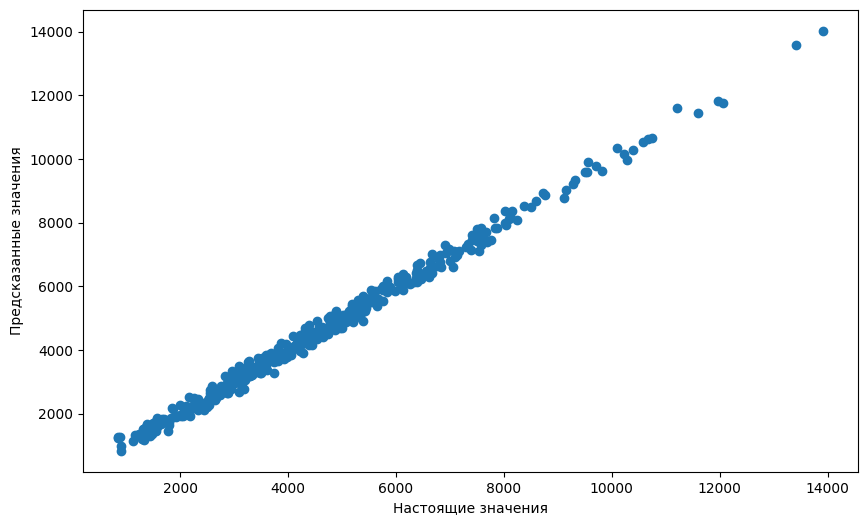

In [ ]:
predicted = cross_val_predict(lr, x, y, cv=5)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.set_xlabel("Настоящие значения")
ax.set_ylabel("Предсказанные значения")
plt.show()

Визуально также подтвердилась высокая точность прогноза.

In [ ]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(lr, x, y, cv=5)

print(predictions)

[[ 3664.57898135]
 [ 6640.82831941]
 [ 7102.14696681]
 [ 9587.31516409]
 [ 4765.79123643]
 [ 7920.61553477]
 [ 3307.42906078]
 [ 7072.38447343]
 [ 3411.59778761]
 [ 6759.87829293]
 [ 8218.24046858]
 [ 1506.79821125]
 [ 5316.39736397]
 [ 7057.50322674]
 [ 3456.24152768]
 [ 2429.43550605]
 [ 3709.22272142]
 [ 4497.928796  ]
 [ 6119.98468525]
 [ 6581.30333265]
 [ 2950.27914021]
 [ 6268.79715215]
 [ 2622.89171303]
 [ 5375.92235073]
 [ 1774.66065168]
 [ 4304.47258903]
 [ 3753.86646149]
 [ 4408.64131586]
 [13575.48927709]
 [ 5569.37855771]
 [ 5599.14105109]
 [ 2578.24797296]
 [ 7831.32805463]
 [ 1863.94813182]
 [ 2414.55425936]
 [ 2727.06043986]
 [ 6224.15341208]
 [ 6328.32213891]
 [ 3917.56017508]
 [ 3381.83529423]
 [ 3218.14158064]
 [ 7459.29688737]
 [ 4676.50375629]
 [ 6075.34094518]
 [ 6432.49086574]
 [ 7846.20930132]
 [ 5048.53492355]
 [ 4215.18510889]
 [ 2503.8417395 ]
 [ 4721.14749636]
 [ 5048.53492355]
 [ 3932.44142177]
 [ 5316.39736397]
 [ 5599.14105109]
 [ 1506.79821125]
 [ 1744.89

Построить диаграмму рассеяния для поиска зависимостей лимита от рейтинга.

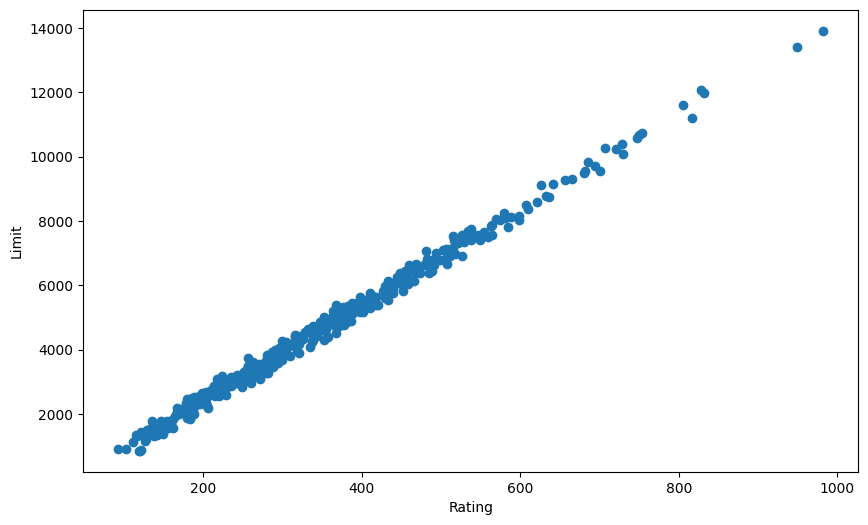

In [ ]:
plt.scatter(x=credit['Rating'],y=credit['Limit'])
plt.xlabel('Rating')
plt.ylabel('Limit')
plt.show()

Чем выше рейтинг, тем выше лимит по кредитной карте, зависимость между лимитом и рейтингом наблюдается.

Воспользоваться моделью линейной регрессии

$$
\text{Limit} = \beta_0 + \beta_1 \text{Rating}.
$$

In [ ]:
ad_credit_ols = sm.ols(formula="Limit ~ Rating", data=credit).fit()
ad_credit_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 6.348e+04
Date:                Sun, 17 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:34:37   Log-Likelihood:                -2649.1
No. Observations:                 400   AIC:                             5302.
Df Residuals:                     398   BIC:                             5310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -542.9282     22.850    -23.760      0.000    -587.851    -498.006
Rating        14.8716      0.059    251.949      0.000      14.756      14.988
==============================================================================
Omnibus:                        6.887   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                4.980
Skew:                          -0.145   Prob(JB):                       0.0829
Kurtosis:                       2.537   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Начало линии равно  β^0=-542.928 . Это означает, что без рейтинга модель прогнозирует, что лимит будет отрицательным, то есть его не выдадут.

Наклон линии  β^1=14.8716. Это означает, что модель предсказывает, что на каждый дополнительный балл рейтинга, будет выдано на 14 рублей больше.

В модели значение  R2=0,739, что неплохо. Модель объясняет  99,4%  изменчивости лимита, что почти 100%.

p  для F-статистики равно 0, что указывает на значимость модели.

В простой линейной регрессии нулевая гипотеза:
$$
H_0:\text{Между $рейтингом$ и $лимитом$ не существует линейной зависимости} \iff \beta_1 = 0
$$
с альтернативой
$$
H_a: \text{Между $рейтингом$ и $лимитом$ существует линейная зависимость} \iff \beta_1 \neq 0
$$

Выше была доказана связь между рейтингом и лимитом.

## Задание 2: Прогнозирование лимита без рейтинга

Поскольку `Рейтинг` и `Лимит` — это практически одна и та же переменная, исключим `Рейтинг` и просто попробуем спрогнозировать `Лимит` на основе вещественнозначных переменных (некатегориальных переменных): Доход, Карты, Возраст, Образование, Баланс.

**Упражнение.** Разработайте модель множественной линейной регрессии для прогнозирования рейтинга. Интерпретируйте результаты.

А пока просто сосредоточьтесь на переменных с численными значениями (доход, карты, возраст, образование, баланс).

В первом приближении не использовать категориальные переменные (Пол, Студент, Семейное положение, Этническая принадлежность).



Проставим постепенно переменные в модели, чтобы понять, какие нужны, а какие нет.

**Model:**
$$
Лимит = \beta_0 + \beta_1 * Доход.
$$

In [4]:
ad_chisl_ols = sm.ols(formula="Limit ~ Income", data=credit).fit()
ad_chisl_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     670.2
Date:                Mon, 13 May 2024   Prob (F-statistic):           2.39e-87
Time:                        09:23:46   Log-Likelihood:                -3467.3
No. Observations:                 400   AIC:                             6939.
Df Residuals:                     398   BIC:                             6947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2389.8694    114.829     20.812      0.000    2164.123    2615.616
Income         0.0519      0.002     25.888      0.000       0.048       0.056
==============================================================================
Omnibus:                      141.700   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.008
Skew:                          -0.064   Prob(JB):                     2.74e-05
Kurtosis:                       1.885   Cond. No.                     9.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

При увеличении дохода на 1 единицу, лимит увеличится на 0.0519. Значение p для образования очень мало. Значение p для F -статистики пренибрежимо мало, что указывает на значимость нашей модели, R-squared тоже хороший 0.627. Доход можно оставить.

**Model:**
$$
Лимит = \beta_0 + \beta_1 * Карты.
$$

In [5]:
ad_chisl_ols = sm.ols(formula="Limit ~ Cards", data=credit).fit()
ad_chisl_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.04167
Date:                Mon, 13 May 2024   Prob (F-statistic):              0.838
Time:                        09:31:13   Log-Likelihood:                -3664.7
No. Observations:                 400   AIC:                             7333.
Df Residuals:                     398   BIC:                             7341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4684.6662    274.978     17.037      0.000    4144.076    5225.257
Cards         17.2219     84.369      0.204      0.838    -148.643     183.087
==============================================================================
Omnibus:                       46.466   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.069
Skew:                           0.833   Prob(JB):                     3.33e-14
Kurtosis:                       3.973   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

При увеличении карт на 1 единицу, лимит увеличится на 17. Значение p для карт очень большое. Не существует достаточных доказательств, чтобы исключить нулевую гипотезу о том, что переменные Карты и Лимит не имеют связи. Значение p для F -статистики большое, что указывает на низкую значимость нашей модели. Карты можно убрать.

**Model:**
$$
Лимит = \beta_0 + \beta_1 * Возраст.
$$

In [7]:
ad_chisl_ols = sm.ols(formula="Limit ~ Age", data=credit).fit()
ad_chisl_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.093
Date:                Mon, 13 May 2024   Prob (F-statistic):             0.0437
Time:                        09:41:50   Log-Likelihood:                -3662.7
No. Observations:                 400   AIC:                             7329.
Df Residuals:                     398   BIC:                             7337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3984.0985    388.857     10.246      0.000    3219.629    4748.568
Age           13.4998      6.673      2.023      0.044       0.381      26.619
==============================================================================
Omnibus:                       41.937   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.407
Skew:                           0.782   Prob(JB):                     1.53e-12
Kurtosis:                       3.906   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

При увеличении возраста на 1 год, лимит увеличится на 13. Значение p для карт очень маленькое. R-squared маленький. Возраст можно убрать, значимость низкая.

**Model:**
$$
Лимит = \beta_0 + \beta_1 * Образование.
$$

In [8]:
ad_chisl_ols = sm.ols(formula="Limit ~ Education", data=credit).fit()
ad_chisl_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2208
Date:                Mon, 13 May 2024   Prob (F-statistic):              0.639
Time:                        09:44:46   Log-Likelihood:                -3664.7
No. Observations:                 400   AIC:                             7333.
Df Residuals:                     398   BIC:                             7341.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4969.5271    511.029      9.725      0.000    3964.874    5974.180
Education    -17.3924     37.011     -0.470      0.639     -90.154      55.369
==============================================================================
Omnibus:                       47.086   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.382
Skew:                           0.837   Prob(JB):                     1.72e-14
Kurtosis:                       3.999   Cond. No.                         61.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

При увеличении уровня образования на 1 единицу, лимит уменьшится на 17. Значение p для образования очень большое. Не существует достаточных доказательств, чтобы исключить нулевую гипотезу о том, что переменные Образование и Лимит не имеют связи. Значение p для F -статистики большое, что указывает на низкую значимость нашей модели. Образование можно убрать.

**Model:**
$$
Лимит = \beta_0 + \beta_1 * Баланс.
$$

In [9]:
ad_chisl_ols = sm.ols(formula="Limit ~ Balance", data=credit).fit()
ad_chisl_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1148.
Date:                Mon, 13 May 2024   Prob (F-statistic):          2.53e-119
Time:                        09:47:16   Log-Likelihood:                -3393.4
No. Observations:                 400   AIC:                             6791.
Df Residuals:                     398   BIC:                             6799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2485.9566     88.586     28.063      0.000    2311.802    2660.111
Balance        4.3261      0.128     33.879      0.000       4.075       4.577
==============================================================================
Omnibus:                       21.227   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.462
Skew:                           0.424   Prob(JB):                     4.00e-07
Kurtosis:                       4.024   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

При увеличении уровня баланса на 1 единицу, лимит увеличится на 4. Значение p для образования очень мало. Значение p для F -статистики маленькое, что указывает на значимость нашей модели. Баланс можно оставить.

Какие независимые переменные являются хорошими/плохими предикторами? Какая модель в целом является лучшей?

По p значению хорошими являются доход, баланс, для них значение p очень маленькое, плохими возраст, образование и карты.

Строим еще одну модель с хорошими предикторами.

**Model:**
$$
Лимит = \beta_0 + \beta_1 * Доход + \beta_2*Баланс.
$$

In [10]:
ad_chisl1_ols = sm.ols(formula="Limit ~ Income + Balance", data=credit).fit()
ad_chisl1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3046.
Date:                Mon, 13 May 2024   Prob (F-statistic):          1.37e-241
Time:                        09:49:40   Log-Likelihood:                -3106.0
No. Observations:                 400   AIC:                             6218.
Df Residuals:                     397   BIC:                             6230.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1610.3665     49.710     32.395      0.000    1512.639    1708.094
Income         0.0327      0.001     35.691      0.000       0.031       0.035
Balance        3.1621      0.070     44.955      0.000       3.024       3.300
==============================================================================
Omnibus:                       72.111   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.872
Skew:                          -1.278   Prob(JB):                     1.39e-24
Kurtosis:                       3.241   Cond. No.                     9.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

При увеличении дохода на 1 единицу, лимит увеличится на 0.03. При увеличении баланса на 1 единицу, лимит увеличится на 3. Значение p для переменных 0. Значение p для F -статистики маленькое, что указывает на значимость нашей модели. R-squared 0.939.

## Задание 3. Включение категориальных переменных в модель регрессии

Рассмотреть двоичные категориальные переменные, которые были ранее сопоставлены с целочисленными значениями 0, 1 в в `лекции 4.2`.

**Model:**
$$
Лимит = \beta_0 + \beta_1 * Доход + \beta_2*Баланс + \beta_3*Пол.
$$

In [11]:
credit["Gender_num"] = credit["Gender"].map({' Male':0, 'Female':1})
credit["Student_num"] = credit["Student"].map({'Yes':1, 'No':0})
credit["Married_num"] = credit["Married"].map({'Yes':1, 'No':0})

In [17]:
ad_categor1_ols = sm.ols(formula="Limit ~ Income + Balance + Gender_num", data=credit).fit()
ad_categor1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     2026.
Date:                Mon, 13 May 2024   Prob (F-statistic):          8.51e-240
Time:                        10:04:00   Log-Likelihood:                -3106.0
No. Observations:                 400   AIC:                             6220.
Df Residuals:                     396   BIC:                             6236.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1607.4134     57.891     27.766      0.000    1493.601    1721.226
Income         0.0328      0.001     35.639      0.000       0.031       0.035
Balance        3.1619      0.070     44.876      0.000       3.023       3.300
Gender_num     5.7302     57.370      0.100      0.920    -107.057     118.518
==============================================================================
Omnibus:                       72.219   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.084
Skew:                          -1.279   Prob(JB):                     1.25e-24
Kurtosis:                       3.244   Cond. No.                     1.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Значение p для пола большое. Не существует достаточных доказательств, чтобы исключить нулевую гипотезу о том, что переменные Пол и Лимит не имеют связи. R-squared 0.939, модель объясняет 94% изменчивости данных, исключаем.

**Model:**
$$
Лимит = \beta_0 + \beta_1 * Доход + \beta_2*Баланс + \beta_3*Студент.
$$

In [18]:
ad_categor1_ols = sm.ols(formula="Limit ~ Income + Balance + Student_num", data=credit).fit()
ad_categor1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     4875.
Date:                Mon, 13 May 2024   Prob (F-statistic):          3.55e-312
Time:                        10:04:56   Log-Likelihood:                -2937.6
No. Observations:                 400   AIC:                             5883.
Df Residuals:                     396   BIC:                             5899.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1671.8940     32.784     50.998      0.000    1607.442    1736.346
Income          0.0311      0.001     51.242      0.000       0.030       0.032
Balance         3.4730      0.048     72.069      0.000       3.378       3.568
Student_num -1494.7953     65.365    -22.868      0.000   -1623.301   -1366.290
==============================================================================
Omnibus:                       86.280   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.706
Skew:                          -1.295   Prob(JB):                     1.03e-31
Kurtosis:                       4.360   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Значение p для статуса студента 0.  R-squared 0.974, модель объясняет 97% изменчивости данных, включаем, модель стала лучше и Р для F-statistic маленькое, модель значима.

**Model:**
$$
Лимит = \beta_0 + \beta_1 * Доход + \beta_2*Баланс + \beta_3*Семейноеположение.
$$

In [19]:
ad_categor_ols = sm.ols(formula="Limit ~ Income + Balance + Married_num", data=credit).fit()
ad_categor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     2036.
Date:                Mon, 13 May 2024   Prob (F-statistic):          3.38e-240
Time:                        10:05:46   Log-Likelihood:                -3105.0
No. Observations:                 400   AIC:                             6218.
Df Residuals:                     396   BIC:                             6234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1562.4867     60.808     25.696      0.000    1442.940    1682.033
Income          0.0327      0.001     35.638      0.000       0.031       0.034
Balance         3.1645      0.070     45.023      0.000       3.026       3.303
Married_num    80.1222     58.733      1.364      0.173     -35.345     195.589
==============================================================================
Omnibus:                       72.075   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.695
Skew:                          -1.276   Prob(JB):                     1.51e-24
Kurtosis:                       3.253   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Значение p для семейного положения большое. Не существует достаточных доказательств, чтобы исключить нулевую гипотезу о том, что переменные Семейное положение и Лимит не имеют связи. R-squared 0.939, модель объясняет 94% изменчивости данных, исключаем.

Можете ли улучшить модель, которая разработана в задании `2`, включив в нее одну или несколько из этих переменных?


**Ваш ответ:**
Модель с включением категориальных переменных стала точнее, R2 был 0.939, стал 0.974, модель стала объяснять больше изменчивости данных. По доходу и балансу коэффициенты поменялись. Модель значительно лучше предыущих.

In [20]:
ad_categor1_ols = sm.ols(formula="Limit ~ Income + Balance + Student_num", data=credit).fit()
ad_categor1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     4875.
Date:                Mon, 13 May 2024   Prob (F-statistic):          3.55e-312
Time:                        10:11:36   Log-Likelihood:                -2937.6
No. Observations:                 400   AIC:                             5883.
Df Residuals:                     396   BIC:                             5899.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1671.8940     32.784     50.998      0.000    1607.442    1736.346
Income          0.0311      0.001     51.242      0.000       0.030       0.032
Balance         3.4730      0.048     72.069      0.000       3.378       3.568
Student_num -1494.7953     65.365    -22.868      0.000   -1623.301   -1366.290
==============================================================================
Omnibus:                       86.280   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.706
Skew:                          -1.295   Prob(JB):                     1.03e-31
Kurtosis:                       4.360   Cond. No.                     1.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Влияние дохода есть, но оно незначительно, т.к. коэффициент равен 0.03, а при увеличении баланса на 1 единицу, лимит увеличится на 3.5 рубля, если ты студент, то твой лимит меньше на 1495 рублей.